# Ex4 - Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

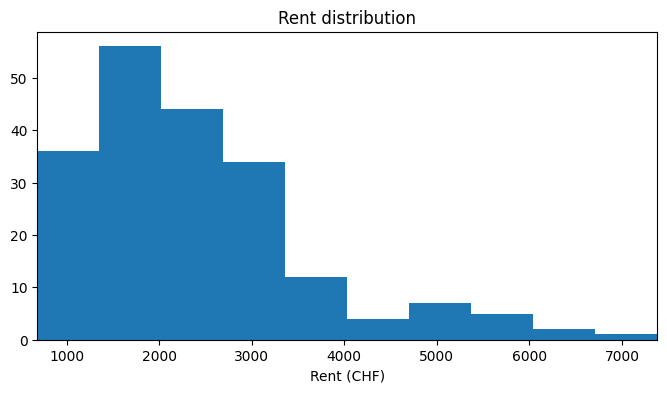

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

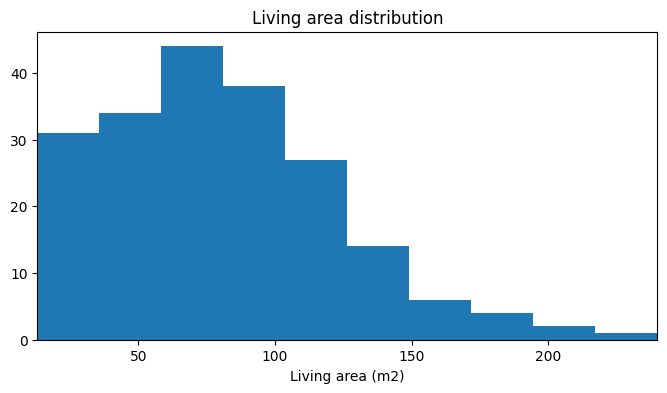

In [7]:
# Your code here
plt.figure(1, figsize=(8,4))
plt.hist(living_area)
plt.xlabel('Living area (m2)')
plt.title('Living area distribution')
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

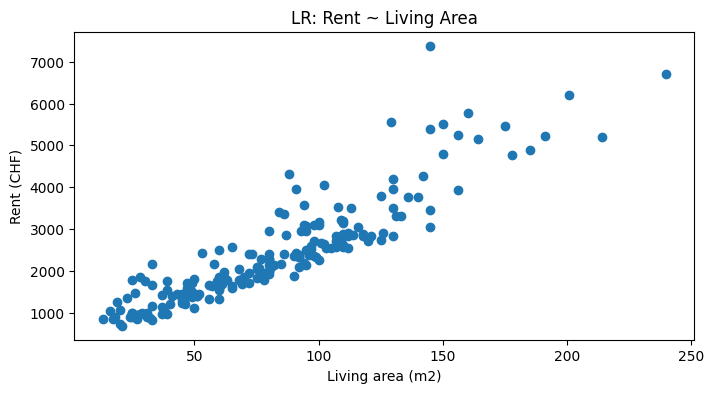

In [8]:
# Your code here
plt.figure(1, figsize=(8,4))
plt.scatter(living_area, rent_price)
plt.xlabel('Living area (m2)')
plt.ylabel('Rent (CHF)')
plt.title('LR: Rent ~ Living Area')
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

$$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$$

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

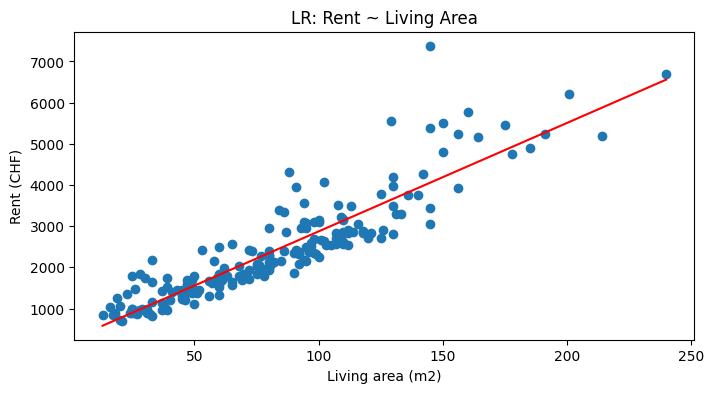

In [9]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to no.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################

n = len(dataset)
x = np.column_stack((np.ones((n)), living_area))
y = rent_price

theta = np.dot(np.dot(inv(np.dot(x.T, x)), x.T), y)

x_line = np.linspace(min(living_area), max(living_area), n)
x_line_matrix = np.column_stack((np.ones(n), x_line))
y_line = np.dot(x_line_matrix, theta)

plt.figure(1, figsize=(8,4))
plt.scatter(living_area, rent_price, label='Data Points')
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('Living area (m2)')
plt.ylabel('Rent (CHF)')
plt.title('LR: Rent ~ Living Area')
plt.legend
plt.show()

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

In [10]:
theta

array([240.07710727,  26.33242457])

In [11]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################

def h_theta(x, theta):
    return theta[0] + theta[1] * x[1]

def mse_loss(x, y, theta):
    sum = 0
    for x, y in zip(x, y):
        sum += (h_theta(x, theta) - y) ** 2
    return sum / (n - 2)

print(mse_loss(x, y, theta))

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

278844.487611786


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

In [12]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
Xy_train, Xy_test = train_test_split(dataset, test_size=0.3, random_state=42)

scaler = StandardScaler()
Xy_train_scaled = scaler.fit_transform(Xy_train)
Xy_test_scaled = scaler.transform(Xy_test)

Learned Parameters: Bias = -0.00, Slope = 0.90
Final Loss (MSE): 6892058.5000


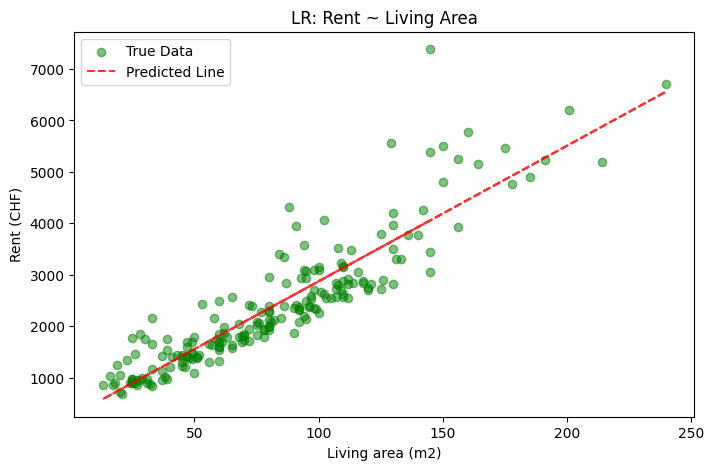

In [14]:
#######################################################################
# TODO:                                                               #
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################

import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

device = (
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

class linearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = dataset[['living_area']].values
y_train = dataset[['rent_price']].values

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

input_size = 1
output_size = 1
lr = 0.01
epochs = 1000

model = linearRegression(input_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

theta1 = model.linear.weight.item()
theta0 = model.linear.bias.item()
print(f"Learned Parameters: Bias = {theta0:.2f}, Slope = {theta1:.2f}")

with torch.no_grad():
    y_hat = model(X_train_tensor).cpu().numpy()

y_hat = scaler_y.inverse_transform(y_hat)

final_loss = criterion(torch.tensor(y_hat, dtype=torch.float32).to(device), y_train_tensor).item()
print(f'Final Loss (MSE): {final_loss:.4f}')

plt.figure(figsize=(8, 5))
plt.scatter(dataset['living_area'], dataset['rent_price'], color='green', label='True Data', alpha=0.5)
plt.plot(dataset['living_area'], y_hat, '--', color='red', label='Predicted Line', alpha=0.8)
plt.xlabel('Living area (m2)')
plt.ylabel('Rent (CHF)')
plt.title('LR: Rent ~ Living Area')
plt.legend()
plt.show()
        
######################################################################
#                         END OF YOUR CODE                            #
#######################################################################
